In [132]:
# packages used
import pandas as pd
import statsmodels.api as sm
import plotly.figure_factory as ff
import numpy as np
from statsmodels.graphics.gofplots import qqplot

In [133]:
# Creating Class instance for automated analysis
# Input - pandas dataframe
# Target variable must be the last column (most of the times 
# it is like that)

class LROLS:
    def __init__(self, pd_data):
        self.pd_data = pd_data
        self.results = None
    
    #Makes an analysis. The output is the fitted model
    def analyze(self, const = True):
        X = self.pd_data.iloc[:, :-1]
        y = self.pd_data.iloc[:, -1]

        if const == True:
            X = sm.add_constant(X)
        
        model = sm.OLS(y, X)
        self.results = model.fit()
        return self.results

    #Filters out p values larger than 0.05 and makes a new df. Returns new df itself
    def make_new(self):
        check_p = self.results.pvalues[self.results.pvalues > 0.05].index.tolist()
        if 'const' in check_p:
            check_p.remove('const')
        new_data = self.pd_data.drop(check_p, axis = 1)
        return LROLS(new_data)
    
    #Makes a distplot to visually check if the data is distributed normally
    def norm_check(self):
        sd = np.std([self.results.resid])
        norm_dat = np.random.normal(0,sd,10000)
        fig = ff.create_distplot([self.results.resid,norm_dat],["Residuals","Normal distribution(0,sigma)"])
        return fig

## Red wine analysis

In [134]:
wine_red = pd.read_csv("winequality-red.csv", delimiter=";")
wine_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [135]:
#Whole analysis, see class instance
wine_red_model = LROLS(wine_red)
wine_red_results = wine_red_model.analyze()

In [136]:
#Coefficients
print(wine_red_results.params)

const                   21.965208
fixed acidity            0.024991
volatile acidity        -1.083590
citric acid             -0.182564
residual sugar           0.016331
chlorides               -1.874225
free sulfur dioxide      0.004361
total sulfur dioxide    -0.003265
density                -17.881164
pH                      -0.413653
sulphates                0.916334
alcohol                  0.276198
dtype: float64


In [137]:
#Pvalues
print(wine_red_results.pvalues)

const                   3.001921e-01
fixed acidity           3.356528e-01
volatile acidity        9.872361e-19
citric acid             2.149942e-01
residual sugar          2.764960e-01
chlorides               8.373953e-06
free sulfur dioxide     4.474495e-02
total sulfur dioxide    8.004610e-06
density                 4.086079e-01
pH                      3.100189e-02
sulphates               2.127228e-15
alcohol                 1.123029e-24
dtype: float64


Columns that have pvalues more than 0.05: fixed acidity, citric acid, residual sugar, density

In [138]:
print(wine_red_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.79e-145
Time:                        23:55:13   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [139]:
print(wine_red_results.mse_resid, wine_red_results.mse_model, wine_red_results.mse_total)

0.4199185257637247 34.159491163860224 0.6521683999934252


### Removing columns that have p > 0.05 and constructing adjusted model (adj) for red wine

In [140]:
#LROLS method
wine_red_adj = wine_red_model.make_new().pd_data
wine_red_adj

volatile acidity  chlorides  free sulfur dioxide  total sulfur dioxide   
0                0.700      0.076                 11.0                  34.0  \
1                0.880      0.098                 25.0                  67.0   
2                0.760      0.092                 15.0                  54.0   
3                0.280      0.075                 17.0                  60.0   
4                0.700      0.076                 11.0                  34.0   
...                ...        ...                  ...                   ...   
1594             0.600      0.090                 32.0                  44.0   
1595             0.550      0.062                 39.0                  51.0   
1596             0.510      0.076                 29.0                  40.0   
1597             0.645      0.075                 32.0                  44.0   
1598             0.310      0.067                 18.0                  42.0   

        pH  sulphates  alcohol  quality  
0     3.51       0.56      9.4        5  
1     3.20       0.68      9.8        5  
2     3.26       0.65      9.8        5  
3     3.16       0.58      9.8        6  
4     3.51       0.56      9.4        5  
...    ...        ...      ...      ...  
1594  3.45       0.58     10.5        5  
1595  3.52       0.76     11.2        6  
1596  3.42       0.75     11.0        6  
1597  3.57       0.71     10.2        5  
1598  3.39       0.66     11.0        6  

[1599 rows x 8 columns]

In [141]:
wine_red_adj_model = LROLS(wine_red_adj)
wine_red_adj_results = wine_red_adj_model.analyze()

In [142]:
print(wine_red_adj_results.params)

const                   4.430099
volatile acidity       -1.012753
chlorides              -2.017814
free sulfur dioxide     0.005077
total sulfur dioxide   -0.003482
pH                     -0.482661
sulphates               0.882665
alcohol                 0.289303
dtype: float64


In [143]:
print(wine_red_adj_results.pvalues)

const                   3.726733e-27
volatile acidity        4.721084e-23
chlorides               4.313717e-07
free sulfur dioxide     1.702156e-02
total sulfur dioxide    4.434834e-07
pH                      4.234962e-05
sulphates               1.864837e-15
alcohol                 4.236397e-61
dtype: float64


In [144]:
print(wine_red_adj_results.mse_resid, wine_red_adj_results.mse_model, wine_red_adj_results.mse_total)

0.41957074736378136 53.51829201910248 0.6521683999934252


In [145]:
print(wine_red_adj_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.32e-149
Time:                        23:55:13   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

In [146]:
# Predictions
df_len = len(wine_red_adj.index)
seed = np.random.seed(1003)
selection = np.random.randint(0, df_len, 10)
selection

array([1309, 1373,  837,  656, 1106,  594,  252,  562,  929,  355])

In [147]:
test_df_red = wine_red_adj.iloc[selection,:-1]
test_df_red

volatile acidity  chlorides  free sulfur dioxide  total sulfur dioxide   
1309              0.62      0.071                 27.0                  63.0  \
1373              0.75      0.110                 34.0                  89.0   
837               0.28      0.012                 36.0                 100.0   
656               0.43      0.106                  8.0                  32.0   
1106              0.23      0.069                  9.0                  17.0   
594               0.72      0.096                 20.0                  38.0   
252               0.35      0.090                  5.0                  21.0   
562               0.54      0.094                 41.0                 110.0   
929               0.33      0.063                 10.0                  19.0   
355               0.75      0.078                 17.0                  32.0   

        pH  sulphates  alcohol  
1309  3.28       0.61      9.2  
1373  3.24       0.45      9.3  
837   3.26       0.39     11.7  
656   2.89       0.50      9.6  
1106  3.21       0.54     12.3  
594   3.40       0.53      9.5  
252   3.17       0.53     10.5  
562   3.08       0.61      9.2  
929   3.30       0.73     12.0  
355   3.55       0.61     12.8

In [148]:
test_df_red = sm.add_constant(test_df_red)
test_predictions_red = wine_red_adj_results.predict(test_df_red)
print(test_predictions_red)


1309    5.193516
1373    4.835177
837     6.112480
656     5.533661
1106    6.530154
594     5.051568
252     5.821746
562     5.232077
929     6.476575
355     6.016081
dtype: float64


In [149]:
print(wine_red_adj.iloc[selection, -1])

1309    5
1373    5
837     7
656     5
1106    6
594     5
252     5
562     5
929     7
355     6
Name: quality, dtype: int64


In [150]:
wine_red_fig = wine_red_adj_model.norm_check()
wine_red_fig.show()

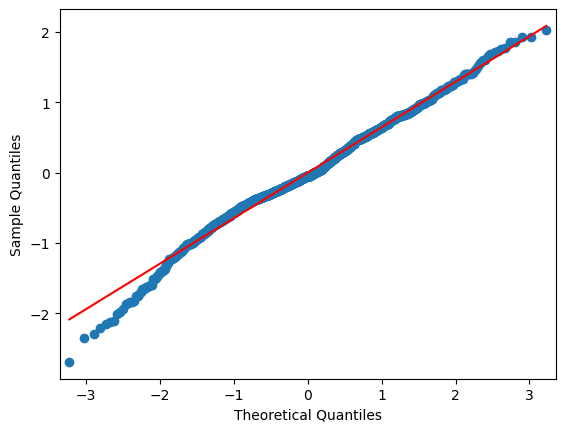

In [151]:
gg = wine_red_adj_results.resid
qqplot_data_red = qqplot(gg, line='s').gca().lines

#### Feedback on the model:

The model is not accurate because of low R-squared score (around 0.36). Removing the columns with p > 0.05 had no visible effect: R-squared changed from 0.361 to 0.359, MSE: changed only mse model values from 34,16 to 53,52. The data of the model does not confine to normality because it is observed that the qqplot values are not linear and the distribution of the model is a bit different from the Gauss curve. The predictions are somewhat accurate: if the results would be rounded-up, 5 of 10 predictions would be correct

## White wine analysis

In [152]:
wine_white = pd.read_csv("winequality-white.csv", delimiter=";")
wine_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.0              0.27         0.36            20.7      0.045  \
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    45.0                 170.0  1.00100  3.00       0.45  \
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [153]:
wine_white_model = LROLS(wine_white)
wine_white_results = wine_white_model.analyze()

In [154]:
print(wine_white_results.params)

const                   150.192842
fixed acidity             0.065520
volatile acidity         -1.863177
citric acid               0.022090
residual sugar            0.081483
chlorides                -0.247277
free sulfur dioxide       0.003733
total sulfur dioxide     -0.000286
density                -150.284181
pH                        0.686344
sulphates                 0.631476
alcohol                   0.193476
dtype: float64


In [155]:
print(wine_white_results.pvalues)

const                   1.707781e-15
fixed acidity           1.706038e-03
volatile acidity        1.058005e-58
citric acid             8.175888e-01
residual sugar          5.298587e-27
chlorides               6.509735e-01
free sulfur dioxide     9.994821e-06
total sulfur dioxide    4.497912e-01
density                 4.044493e-15
pH                      8.102311e-11
sulphates               3.440472e-10
alcohol                 1.699500e-15
dtype: float64


In [156]:
print(wine_white_results.mse_resid, wine_white_results.mse_model, wine_white_results.mse_total)

0.5645371675232171 98.42374465757236 0.7843556854710506


In [157]:
print(wine_white_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:55:15   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

### Removing columns that have p > 0.05 and constructing adjusted model (adj) for white wine

In [158]:
wine_white_adj = wine_white_model.make_new().pd_data
wine_white_adj

fixed acidity  volatile acidity  residual sugar  free sulfur dioxide   
0               7.0              0.27            20.7                 45.0  \
1               6.3              0.30             1.6                 14.0   
2               8.1              0.28             6.9                 30.0   
3               7.2              0.23             8.5                 47.0   
4               7.2              0.23             8.5                 47.0   
...             ...               ...             ...                  ...   
4893            6.2              0.21             1.6                 24.0   
4894            6.6              0.32             8.0                 57.0   
4895            6.5              0.24             1.2                 30.0   
4896            5.5              0.29             1.1                 20.0   
4897            6.0              0.21             0.8                 22.0   

      density    pH  sulphates  alcohol  quality  
0     1.00100  3.00       0.45      8.8        6  
1     0.99400  3.30       0.49      9.5        6  
2     0.99510  3.26       0.44     10.1        6  
3     0.99560  3.19       0.40      9.9        6  
4     0.99560  3.19       0.40      9.9        6  
...       ...   ...        ...      ...      ...  
4893  0.99114  3.27       0.50     11.2        6  
4894  0.99490  3.15       0.46      9.6        5  
4895  0.99254  2.99       0.46      9.4        6  
4896  0.98869  3.34       0.38     12.8        7  
4897  0.98941  3.26       0.32     11.8        6  

[4898 rows x 9 columns]

In [159]:
wine_white_adj_model = LROLS(wine_white_adj)
wine_white_adj_results = wine_white_adj_model.analyze()

In [160]:
print(wine_white_adj_results.params)

const                  154.106249
fixed acidity            0.068104
volatile acidity        -1.888140
residual sugar           0.082847
free sulfur dioxide      0.003349
density               -154.291277
pH                       0.694213
sulphates                0.628508
alcohol                  0.193163
dtype: float64


In [161]:
print(wine_white_adj_results.pvalues)

const                  2.206827e-17
fixed acidity          8.643880e-04
volatile acidity       1.020239e-64
residual sugar         1.391738e-29
free sulfur dioxide    7.673309e-07
density                5.275581e-17
pH                     2.066280e-11
sulphates              3.522028e-10
alcohol                1.306643e-15
dtype: float64


In [162]:
print(wine_white_adj_results.mse_resid, wine_white_adj_results.mse_model, wine_white_adj_results.mse_total)

0.5642837748574752 135.27580205919236 0.7843556854710506


In [163]:
print(wine_white_adj_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:55:15   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.1062    

In [164]:
# Predictions
df_len = len(wine_white_adj.index)
seed = np.random.seed(1005)
selection = np.random.randint(0, df_len, 10)
selection

array([1763, 1315, 2323, 1625, 4471, 4456,  132, 4467, 1002, 3497])

In [165]:
test_df_white = wine_white_adj.iloc[selection,:-1]
test_df_white = sm.add_constant(test_df_white)
test_predictions_white = wine_white_adj_results.predict(test_df_white)
print(test_predictions_white)

1763    5.870755
1315    5.839269
2323    6.155292
1625    5.677026
4471    6.554664
4456    5.784301
132     5.401115
4467    5.925180
1002    5.495591
3497    6.635174
dtype: float64


In [166]:
print(wine_white_adj.iloc[selection, -1])

1763    6
1315    6
2323    6
1625    6
4471    6
4456    5
132     5
4467    5
1002    6
3497    6
Name: quality, dtype: int64


In [167]:
wine_white_fig = wine_white_adj_model.norm_check()
wine_white_fig.show()

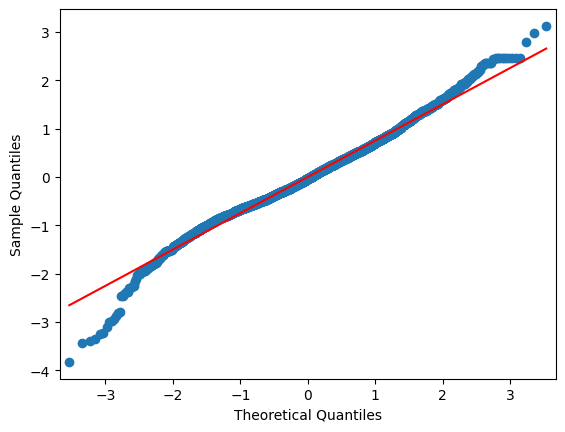

In [168]:
aa = wine_white_adj_results.resid
qqplot_data_white = qqplot(aa, line='s').gca().lines

#### Feedback on the model:

The model is not linear because of low R-squared score (around 0.28). Removing the columns with p > 0.05 had no visible effect: R-squared did not change at all, MSE: changed only mse model values from 98,42 to 135,28. The data of the model does not confine to normality because it is observed that the qqplot values are not linear and the distribution of the model is a bit different from the Gauss curve. The predictions are somewhat accurate: if the results would be rounded-up, 5 of 10 predictions would be correct

About wine datasets in general: using linear regression was a great start, for the future analysis I would look into different models since target variable (quality) can also be looked as a categorical variable with orders, like a category '4', '5', '6' and so on. And, of course, would compare with this model and depending on the results, would then look into pipelines

## My chosen dataset: life expectancy

In [169]:
#Looking into data
life = pd.read_csv("life-expectancy-data.csv")
life

Country  Year      Status  Life expectancy   Adult Mortality   
0     Afghanistan  2015  Developing              65.0            263.0  \
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    
0                62     0.01               71.279624         65.0      1154  \
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP   
0     ...    6.0               8.16         65.0        0.1  584.259210  \
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years   
0     33736494.0                   17.2                 17.3  \
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [170]:
life_data.describe()

Country  Adult Mortality  infant deaths      Alcohol   
count  1649.000000      1649.000000    1649.000000  1649.000000  \
mean     91.981807       168.215282      32.553062     4.533196   
std      55.955879       125.310417     120.847190     4.029189   
min       0.000000         1.000000       0.000000     0.010000   
25%      40.000000        77.000000       1.000000     0.810000   
50%      93.000000       148.000000       3.000000     3.790000   
75%     139.000000       227.000000      22.000000     7.340000   
max     192.000000       723.000000    1600.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI    
count             1649.000000  1649.000000    1649.000000  1649.000000  \
mean               698.973558    79.217708    2224.494239    38.128623   
std               1759.229336    25.604664   10085.802019    19.754249   
min                  0.000000     2.000000       0.000000     2.000000   
25%                 37.438577    74.000000       0.000000    19.500000   
50%                145.102253    89.000000      15.000000    43.700000   
75%                509.389994    96.000000     373.000000    55.800000   
max              18961.348600    99.000000  131441.000000    77.100000   

       under-five deaths         Polio  Total expenditure  Diphtheria    
count         1649.000000  1649.000000        1649.000000  1649.000000  \
mean            44.220133    83.564585           5.955925    84.155246   
std            162.897999    22.450557           2.299385    21.579193   
min              0.000000     3.000000           0.740000     2.000000   
25%              1.000000    81.000000           4.410000    82.000000   
50%              4.000000    93.000000           5.840000    92.000000   
75%             29.000000    97.000000           7.470000    97.000000   
max           2100.000000    99.000000          14.390000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years   
count  1649.000000    1649.000000  1.649000e+03            1649.000000  \
mean      1.983869    5566.031887  1.465363e+07               4.850637   
std       6.032360   11475.900117  7.046039e+07               4.599228   
min       0.100000       1.681350  3.400000e+01               0.100000   
25%       0.100000     462.149650  1.918970e+05               1.600000   
50%       0.100000    1592.572182  1.419631e+06               3.000000   
75%       0.700000    4718.512910  7.658972e+06               7.100000   
max      50.600000  119172.741800  1.293859e+09              27.200000   

        thinness 5-9 years  Income composition of resources    Schooling   
count          1649.000000                      1649.000000  1649.000000  \
mean              4.907762                         0.631551    12.119891   
std               4.653757                         0.183089     2.795388   
min               0.100000                         0.000000     4.200000   
25%               1.700000                         0.509000    10.300000   
50%               3.200000                         0.673000    12.300000   
75%               7.100000                         0.751000    14.000000   
max              28.200000                         0.936000    20.700000   

       Life expectancy   
count       1649.000000  
mean          69.302304  
std            8.796834  
min           44.000000  
25%           64.400000  
50%           71.700000  
75%           75.000000  
max           89.000000

In [171]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   int64  
 1   Adult Mortality                  1649 non-null   float64
 2   infant deaths                    1649 non-null   int64  
 3   Alcohol                          1649 non-null   float64
 4   percentage expenditure           1649 non-null   float64
 5   Hepatitis B                      1649 non-null   float64
 6   Measles                          1649 non-null   int64  
 7    BMI                             1649 non-null   float64
 8   under-five deaths                1649 non-null   int64  
 9   Polio                            1649 non-null   float64
 10  Total expenditure                1649 non-null   float64
 11  Diphtheria                       1649 non-null   float64
 12   HIV/AIDS                

### Transformations

In [172]:
# Putting the life expectancy column to the last column since it's target
columns = life.columns.tolist()
columns.remove('Life expectancy ')
columns.append('Life expectancy ')
life_data = life[columns]
life_data

Country  Year      Status  Adult Mortality  infant deaths  Alcohol   
0     Afghanistan  2015  Developing            263.0             62     0.01  \
1     Afghanistan  2014  Developing            271.0             64     0.01   
2     Afghanistan  2013  Developing            268.0             66     0.01   
3     Afghanistan  2012  Developing            272.0             69     0.01   
4     Afghanistan  2011  Developing            275.0             71     0.01   
...           ...   ...         ...              ...            ...      ...   
2933     Zimbabwe  2004  Developing            723.0             27     4.36   
2934     Zimbabwe  2003  Developing            715.0             26     4.06   
2935     Zimbabwe  2002  Developing             73.0             25     4.43   
2936     Zimbabwe  2001  Developing            686.0             25     1.72   
2937     Zimbabwe  2000  Developing            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   ...   
0                  71.279624         65.0      1154   19.1  ...  \
1                  73.523582         62.0       492   18.6  ...   
2                  73.219243         64.0       430   18.1  ...   
3                  78.184215         67.0      2787   17.6  ...   
4                   7.097109         68.0      3013   17.2  ...   
...                      ...          ...       ...    ...  ...   
2933                0.000000         68.0        31   27.1  ...   
2934                0.000000          7.0       998   26.7  ...   
2935                0.000000         73.0       304   26.3  ...   
2936                0.000000         76.0       529   25.9  ...   
2937                0.000000         79.0      1483   25.5  ...   

      Total expenditure  Diphtheria    HIV/AIDS         GDP  Population   
0                  8.16         65.0        0.1  584.259210  33736494.0  \
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2933               7.13         65.0       33.6  454.366654  12777511.0   
2934               6.52         68.0       36.7  453.351155  12633897.0   
2935               6.53         71.0       39.8   57.348340    125525.0   
2936               6.16         75.0       42.1  548.587312  12366165.0   
2937               7.10         78.0       43.5  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years   
0                      17.2                 17.3  \
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Life expectancy   
0                               0.479       10.1              65.0  
1                               0.476       10.0              59.9  
2                               0.470        9.9              59.9  
3                               0.463        9.8              59.5  
4                               0.454        9.5              59.2  
...                               ...        ...               ...  
2933                            0.407        9.2              44.3  
2934                            0.418        9.5              44.5  
2935                            0.427       10.0              44.8  
2936                        

In [173]:
#Changing country names to numerals(from 0 to 192)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(life_data['Country'])
life_data['Country'] = encoder.transform(life_data['Country'])

In [174]:
#Removing columns and NaNs. I believe that status of country does not give much value to the data, it just explains the number behind expentancy to the reader (and categorizes) and year is removed for simplicity
life_data = life_data.drop(['Year', 'Status'], axis = 1)
life_data = life_data.dropna()
life_data

Country  Adult Mortality  infant deaths  Alcohol   
0           0            263.0             62     0.01  \
1           0            271.0             64     0.01   
2           0            268.0             66     0.01   
3           0            272.0             69     0.01   
4           0            275.0             71     0.01   
...       ...              ...            ...      ...   
2933      192            723.0             27     4.36   
2934      192            715.0             26     4.06   
2935      192             73.0             25     4.43   
2936      192            686.0             25     1.72   
2937      192            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI    
0                  71.279624         65.0      1154   19.1  \
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS   
0                     83    6.0               8.16         65.0        0.1  \
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years   
0     584.259210  33736494.0                   17.2                 17.3  \
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  Life expectancy   
0                               0.479       10.1              65.0  
1                               0.476       10.0              59.9  
2                               0.470        9.9              59.9  
3                               0.463        9.8              59.5  
4                               0.454        9.5              59.2  
...                               ...        ...               ...  
2933                            0.407        9.2              44.3  
2934                            0.418        9.5              44.5  
2935                            0.427       10.0              44.8  
2936                    

### Analysis

In [175]:
life_data_model = LROLS(life_data)
life_data_results = life_data_model.analyze()

In [176]:
print(life_data_results.params)

const                              5.320348e+01
Country                            9.381108e-04
Adult Mortality                   -1.688899e-02
infant deaths                      9.409127e-02
Alcohol                           -5.235153e-02
percentage expenditure             3.802699e-04
Hepatitis B                       -5.646975e-03
Measles                           -8.508972e-06
 BMI                               3.346801e-02
under-five deaths                 -7.076729e-02
Polio                              7.652439e-03
Total expenditure                  8.022400e-02
Diphtheria                         1.452337e-02
 HIV/AIDS                         -4.397374e-01
GDP                                1.384733e-05
Population                        -7.132562e-10
 thinness  1-19 years             -5.409118e-03
 thinness 5-9 years               -5.337633e-02
Income composition of resources    9.832669e+00
Schooling                          8.767589e-01
dtype: float64


In [177]:
print(life_data_results.pvalues)

const                               0.000000e+00
Country                             5.674026e-01
Adult Mortality                     4.550452e-65
infant deaths                       3.643670e-18
Alcohol                             8.949578e-02
percentage expenditure              3.535500e-02
Hepatitis B                         2.044790e-01
Measles                             4.313353e-01
 BMI                                3.030271e-08
under-five deaths                   1.892710e-19
Polio                               1.393529e-01
Total expenditure                   4.920463e-02
Diphtheria                          1.465944e-02
 HIV/AIDS                          5.588205e-112
GDP                                 6.257066e-01
Population                          6.841948e-01
 thinness  1-19 years               9.193572e-01
 thinness 5-9 years                 3.100321e-01
Income composition of resources     7.916539e-31
Schooling                           2.819005e-46
dtype: float64


In [178]:
print(life_data_results.mse_resid, life_data_results.mse_model, life_data_results.mse_total)

12.935270594666083 5603.039760235086 77.38429080289907


In [179]:
print(life_data_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     433.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:55:18   Log-Likelihood:                -4440.5
No. Observations:                1649   AIC:                             8921.
Df Residuals:                    1629   BIC:                             9029.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Removing columns that have p > 0.05 and constructing adjusted model (adj) for life expectancy

In [180]:
life_data_adj = life_data_model.make_new().pd_data
life_data_adj

Adult Mortality  infant deaths  percentage expenditure   BMI    
0               263.0             62               71.279624   19.1  \
1               271.0             64               73.523582   18.6   
2               268.0             66               73.219243   18.1   
3               272.0             69               78.184215   17.6   
4               275.0             71                7.097109   17.2   
...               ...            ...                     ...    ...   
2933            723.0             27                0.000000   27.1   
2934            715.0             26                0.000000   26.7   
2935             73.0             25                0.000000   26.3   
2936            686.0             25                0.000000   25.9   
2937            665.0             24                0.000000   25.5   

      under-five deaths   Total expenditure  Diphtheria    HIV/AIDS   
0                     83               8.16         65.0        0.1  \
1                     86               8.18         62.0        0.1   
2                     89               8.13         64.0        0.1   
3                     93               8.52         67.0        0.1   
4                     97               7.87         68.0        0.1   
...                  ...                ...          ...        ...   
2933                  42               7.13         65.0       33.6   
2934                  41               6.52         68.0       36.7   
2935                  40               6.53         71.0       39.8   
2936                  39               6.16         75.0       42.1   
2937                  39               7.10         78.0       43.5   

      Income composition of resources  Schooling  Life expectancy   
0                               0.479       10.1              65.0  
1                               0.476       10.0              59.9  
2                               0.470        9.9              59.9  
3                               0.463        9.8              59.5  
4                               0.454        9.5              59.2  
...                               ...        ...               ...  
2933                            0.407        9.2              44.3  
2934                            0.418        9.5              44.5  
2935                            0.427       10.0              44.8  
2936                            0.427        9.8              45.3  
2937                            0.434        9.8              46.0  

[1649 rows x 11 columns]

In [181]:
life_data_adj_model = LROLS(life_data_adj)
life_data_adj_results = life_data_adj_model.analyze()

In [182]:
print(life_data_adj_results.params)

const                              53.090427
Adult Mortality                    -0.017202
infant deaths                       0.092558
percentage expenditure              0.000452
 BMI                                0.037674
under-five deaths                  -0.070677
Total expenditure                   0.081857
Diphtheria                          0.014266
 HIV/AIDS                          -0.442040
Income composition of resources     9.817675
Schooling                           0.862565
dtype: float64


In [183]:
print(life_data_adj_results.pvalues)

const                               0.000000e+00
Adult Mortality                     4.099631e-68
infant deaths                       9.089391e-21
percentage expenditure              2.580842e-15
 BMI                                2.376393e-11
under-five deaths                   9.159654e-22
Total expenditure                   4.353139e-02
Diphtheria                          1.649097e-03
 HIV/AIDS                          2.911004e-116
Income composition of resources     6.699027e-32
Schooling                           2.070763e-50
dtype: float64


In [184]:
print(life_data_adj_results.mse_resid, life_data_adj_results.mse_model, life_data_adj_results.mse_total)

12.951948608066305 10631.401942316506 77.38429080289907


In [185]:
print(life_data_adj_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     820.8
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:55:18   Log-Likelihood:                -4446.1
No. Observations:                1649   AIC:                             8914.
Df Residuals:                    1638   BIC:                             8974.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [186]:
# Predictions
life_len = len(life_data_adj.index)
seed = np.random.seed(777)
selection_life = np.random.randint(0, life_len, 10)
selection_life

array([ 103,  815, 1595,  934, 1623,   71,  639,  116, 1447,  985])

In [187]:
test_df_life = life_data_adj.iloc[selection_life,:-1]
test_df_life = sm.add_constant(test_df_life)
test_predictions_life = life_data_adj_results.predict(test_df_life)
print(test_predictions_life)

139     78.182816
1452    74.931539
2825    73.268298
1611    70.993650
2857    63.856852
104     71.331242
1113    66.650160
153     69.754930
2561    68.049910
1678    71.045501
dtype: float64


In [188]:
real_values =life_data_adj.iloc[selection_life, -1]
print(real_values)

139     79.3
1452    76.0
2825    75.1
1611    75.0
2857    69.0
104     73.5
1113    66.3
153     69.2
2561    66.1
1678    71.9
Name: Life expectancy , dtype: float64


In [189]:
off = real_values- test_predictions_life
off

139     1.117184
1452    1.068461
2825    1.831702
1611    4.006350
2857    5.143148
104     2.168758
1113   -0.350160
153    -0.554930
2561   -1.949910
1678    0.854499
dtype: float64

In [190]:
life_fig = life_data_adj_model.norm_check()
life_fig.show()

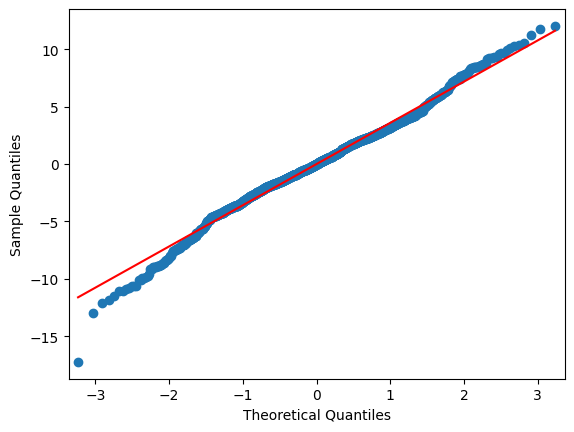

In [191]:
bb = life_data_adj_results.resid
qqplot_data_red = qqplot(bb, line='s').gca().lines

#### Feedback on the model:

The model is 'not that bad' because of R-squared score around 0.83. Removing the columns with p > 0.05 had no visible effect: R-squared changed from 0.835 to 0.834, MSE: changed only mse model values from 5603.04 to 10631.40. The data of the model does not confine to normality because it is observed that the qqplot values are not linear and the distribution of the model is a bit different from the Gauss curve( looking at the density plot). The predictions are somewhat accurate: the differences from life expentancy are from 0 to 5 years, the are 5 predictions that have differences of 1.5 year or less from the real value